In [1]:
##########################################################
#  Python script template for Question 2 (IAML Level 10)
#  Note that
#  - You should not change the name of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from helpers.iaml01cw2_helpers import *
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from iaml01cw2_my_helpers import *

#<----

/Users/davemalvin/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
# Load files and normalize data
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("data")
Xtrn_orig = Xtrn
Xtst_orig = Xtst
Xtrn = Xtrn/255
Xtst = Xtst/255
Xmean = mean(Xtrn)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

# Question 2.1

In [3]:
# Q2.1
logRegr = LogisticRegression()
logRegr.fit(Xtrn_nm, Ytrn)
y_preds = logRegr.predict(Xtst_nm)
print("Accuracy:", accuracy_score(Ytst, y_preds))
cm = metrics.confusion_matrix(Ytst, y_preds)
print(cm)

Accuracy: 0.8401
[[819   3  15  50   7   4  89   1  12   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 731  11 133   0  82   2   9   1]
 [ 31  15  14 866  33   0  37   0   4   0]
 [  0   3 115  38 760   2  72   0  10   0]
 [  2   0   0   1   0 911   0  56  10  20]
 [147   3 128  46 108   0 539   0  28   1]
 [  0   0   0   0   0  32   0 936   1  31]
 [  7   1   6  11   3   7  15   5 945   0]
 [  0   0   0   1   0  15   1  42   0 941]]


# Question 2.2

In [4]:
# Q2.2
svm = SVC(kernel='rbf', C=1.0, gamma='auto')
svm.fit(Xtrn_nm, Ytrn)
preds_svm = svm.predict(Xtst_nm)
print("Accuracy:", accuracy_score(Ytst, preds_svm))
cm_svm = metrics.confusion_matrix(Ytst, preds_svm)
print(cm_svm)

Accuracy: 0.8461
[[845   2   8  51   4   4  72   0  14   0]
 [  4 951   7  31   5   0   1   0   1   0]
 [ 15   2 748  11 137   0  79   0   8   0]
 [ 32   6  12 881  26   0  40   0   3   0]
 [  1   0  98  36 775   0  86   0   4   0]
 [  0   0   0   1   0 914   0  57   2  26]
 [185   1 122  39  95   0 533   0  25   0]
 [  0   0   0   0   0  34   0 925   0  41]
 [  3   1   8   5   2   4  13   4 959   1]
 [  0   0   0   0   0  22   0  47   1 930]]


# Question 2.3

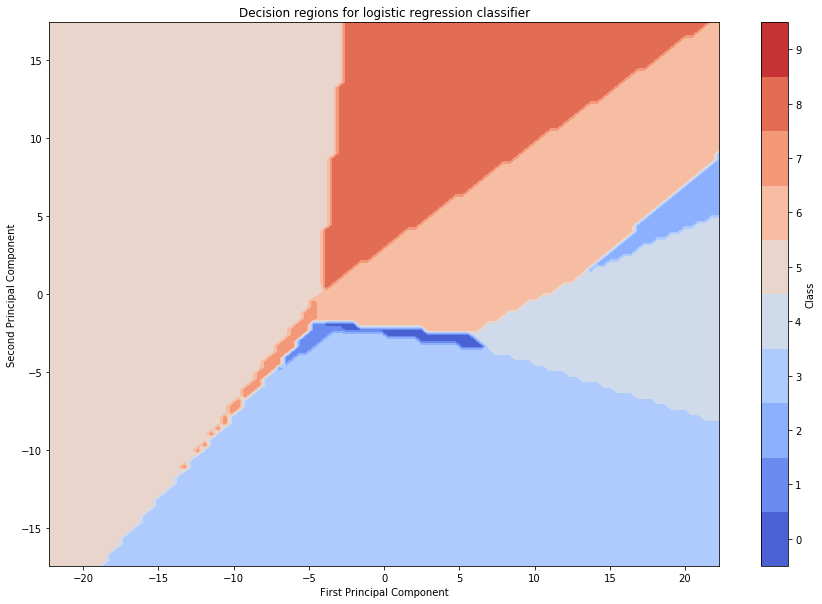

In [7]:
# Q2.3
# Find first 2 PCs
pca = PCA(n_components=2)
pca.fit(Xtrn_nm)
pc1 = pca.components_[0]
pc2 = pca.components_[1]

# Create a rectangular area of 100-by-100 grid points
std = (pca.explained_variance_) ** 0.5
x_pt = std[0]*5
y_pt = std[1]*5
x = np.linspace(-x_pt, x_pt, 100)
y = np.linspace(-y_pt, y_pt, 100)
xx, yy = np.meshgrid(x,y) # Each of shape (100,100)
gridPts = np.c_[xx.ravel(), yy.ravel()] # Make it to shape (10000,2)
tform2 = pca.inverse_transform(gridPts) # Make it to shape (10000,784)

# Predict the grid points with the LogRegr model trained in 2.1
Z = logRegr.predict(tform2) # Shape (10000,)
Z = Z.reshape(xx.shape) # Reshape to (100,100)

# Plot 
plt.figure(figsize=(15,10))
levels = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5]
plt.contourf(xx, yy, Z, levels, cmap=plt.cm.get_cmap('coolwarm'))
plt.colorbar(ticks=range(10),label='Class')
plt.title("Decision regions for logistic regression classifier")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

# Question 2.4

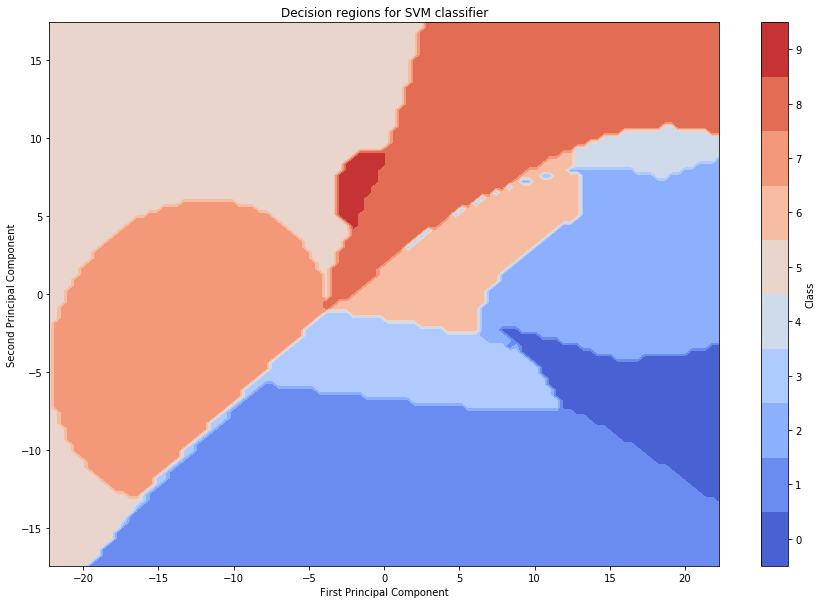

In [8]:
# Q2.4
# Predict the grid points with the LogRegr model trained in 2.1
Z = svm.predict(tform2) # Shape (10000,)
Z = Z.reshape(xx.shape) # Reshape to (100,100)

# Plot
plt.figure(figsize=(15,10))
plt.contourf(xx, yy, Z, levels, cmap=plt.cm.get_cmap('coolwarm'))
plt.colorbar(ticks=range(10),label='Class')
plt.title("Decision regions for SVM classifier")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

# Question 2.5

For c=0.01, the mean accuracy is: 0.6481958005910101
For c=0.03593813663804628, the mean accuracy is: 0.6910976845108582
For c=0.1291549665014884, the mean accuracy is: 0.7367022711334088
For c=0.464158883361278, the mean accuracy is: 0.783804163444882
For c=1.6681005372000592, the mean accuracy is: 0.8197017376658096
For c=5.994842503189409, the mean accuracy is: 0.8447012881144618
For c=21.544346900318846, the mean accuracy is: 0.8565023106939273
For c=77.42636826811278, the mean accuracy is: 0.8542039045033057
For c=278.2559402207126, the mean accuracy is: 0.8495030959102815
For c=1000.0, the mean accuracy is: 0.8406013798229367


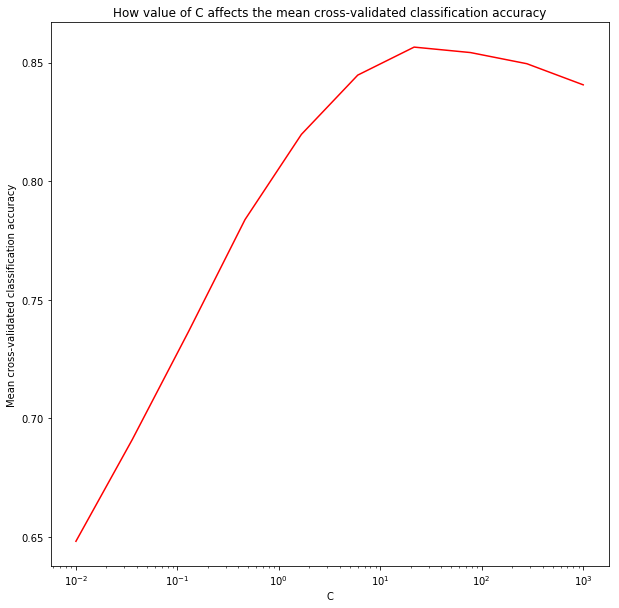

In [9]:
# Q2.5
# Create Xsmall and Ysmall
Xsmall = np.zeros((10000,784))
Ysmall = np.zeros((10000,))
for i in range(10):
    idx = np.where(Ytrn == i)
    Xsmall[0+(1000*i):1000+(1000*i),:] = Xtrn_nm[idx[0]][:1000]
    Ysmall[0+(1000*i):1000+(1000*i)] = Ytrn[idx[0]][:1000]
    
# Do a 3-fold CV 
meanAccuracies = []
for c in np.logspace(-2, 3, num=10):
    clf = SVC(kernel='rbf', C=c, gamma='auto')
    scores = cross_val_score(clf, Xsmall, Ysmall, cv=3)
    
    # Find mean accuracy 
    sum = 0
    for score in scores:
        sum += score
    mean = sum / 3
    meanAccuracies.append(mean)
    print("For c={}, the mean accuracy is: {}".format(c, mean))

# Plot the mean accuracy against the parameter C by using log-scale for x-axis
x = np.logspace(-2, 3, num=10)
plt.figure(figsize=(10,10))
plt.plot(x, meanAccuracies, c='r')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean cross-validated classification accuracy')
plt.title('How value of C affects the mean cross-validated classification accuracy')
plt.show()

# Question 2.6

In [6]:
# Q2.6
# Train the SVM classifier using the optimal value of C from 2.5
svm_c = SVC(kernel='rbf', C=21.544346900318846, gamma='auto')
svm_c.fit(Xtrn_nm, Ytrn)

# Classification accuracy on training set
preds_svm_trn = svm_c.predict(Xtrn_nm)
print("Accuracy for TRAINING set:", accuracy_score(Ytrn, preds_svm_trn))

# Classification accuracy on test set
preds_svm_tst = svm_c.predict(Xtst_nm)
print("Accuracy for TEST set:", accuracy_score(Ytst, preds_svm_tst))

Accuracy for TRAINING set: 0.9084166666666667
Accuracy for TEST set: 0.8765
